In [5]:
!pip install dabl

   ---------------------------------------- 0.0/558.3 kB ? eta -:--:--
   ------------------------------------- -- 524.3/558.3 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 558.3/558.3 kB 1.9 MB/s eta 0:00:00


In [9]:
!pip install optuna

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import dabl
import numba
import random
import plotly.express as px
import math
import optuna
import imblearn
import warnings

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score, accuracy_score, classification_report,f1_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier

In [16]:
df = pd.read_csv('C:/Users/O M A R/Desktop/kaggle/ClaMP_Integrated-5184.csv')

In [18]:
#Display DataFrame Information

print(df)
print(df.head())
print(df.info())
print(df.columns)
print(df.shape)
print(df.describe())

      e_cblp  e_cp  e_cparhdr  e_maxalloc  e_sp  e_lfanew  NumberOfSections  \
0        144     3          4       65535   184       256                 4   
1        144     3          4       65535   184       184                 4   
2        144     3          4       65535   184       272                 5   
3        144     3          4       65535   184       184                 1   
4        144     3          4       65535   184       224                 5   
...      ...   ...        ...         ...   ...       ...               ...   
5205     144     3          4       65535   184       216                 5   
5206      80     2          4       65535   184       256                 7   
5207     144     3          4       65535   184       216                 5   
5208     144     3          4       65535   184       248                 5   
5209     144     3          4       65535   184       240                 4   

      CreationYear  FH_char0  FH_char1  ...  sus_se

In [28]:
# Principal Component Analysis (PCA) implementation
# Step 1: Load the CSV file
# Step 2: Check data types
print(df.dtypes)

# Step 3: Convert categorical features to numeric (if applicable)
# Example: Using pd.get_dummies for one-hot encoding
df = pd.get_dummies(df, drop_first=True)  # This converts categorical variables to numeric

# Step 4: Separate features and target labels
X = df.drop(columns=['class'])  # Drop the target column to get features
y = df['class']  # Target label column

# Step 5: Encode target labels if necessary (ensure y is numeric)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 6: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply PCA and select the first 20 principal components
pca = PCA(n_components=20)  # Retain the first 20 principal components
X_pca = pca.fit_transform(X_scaled)

# Step 8: Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Step 9: Create a DataFrame showing original column names and their contributions to each PCA component
pca_components = pd.DataFrame(data=pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_components = pca_components.T  # Transpose for better readability

# Step 10: Display the explained variance ratios
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
                                       'Explained Variance Ratio': explained_variance})



# Print the PCA component contributions
print("\nOriginal Column Contributions to Each Principal Component:")
print(pca_components)

# Step 11: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 12: Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Step 13: Make predictions
y_pred = clf.predict(X_test)

# Step 14: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after applying PCA: {accuracy * 100:.2f}%")

e_cblp                                 int64
e_cp                                   int64
e_cparhdr                              int64
e_maxalloc                             int64
e_sp                                   int64
                                       ...  
packer_type_WinZip32bitSFXv8xmodule     bool
packer_type_WiseInstallerStub           bool
packer_type_XtremeProtectorv105         bool
packer_type_nSpackV2xLiuXingPing        bool
packer_type_tElock09910privatetE        bool
Length: 108, dtype: object

Original Column Contributions to Each Principal Component:
                                          PC1       PC2       PC3       PC4  \
e_cblp                               0.022423  0.283681 -0.031448 -0.018009   
e_cp                                 0.033839  0.434306 -0.031963 -0.004545   
e_cparhdr                            0.033887  0.434036 -0.031882 -0.004286   
e_maxalloc                           0.002606 -0.107165  0.006027  0.016874   
e_sp                   

In [30]:
#Check for 'null value'

numeric_df = df.select_dtypes(include=['number'])
null_values=df.isnull().sum()
print(null_values)


e_cblp                                 0
e_cp                                   0
e_cparhdr                              0
e_maxalloc                             0
e_sp                                   0
                                      ..
packer_type_WinZip32bitSFXv8xmodule    0
packer_type_WiseInstallerStub          0
packer_type_XtremeProtectorv105        0
packer_type_nSpackV2xLiuXingPing       0
packer_type_tElock09910privatetE       0
Length: 108, dtype: int64


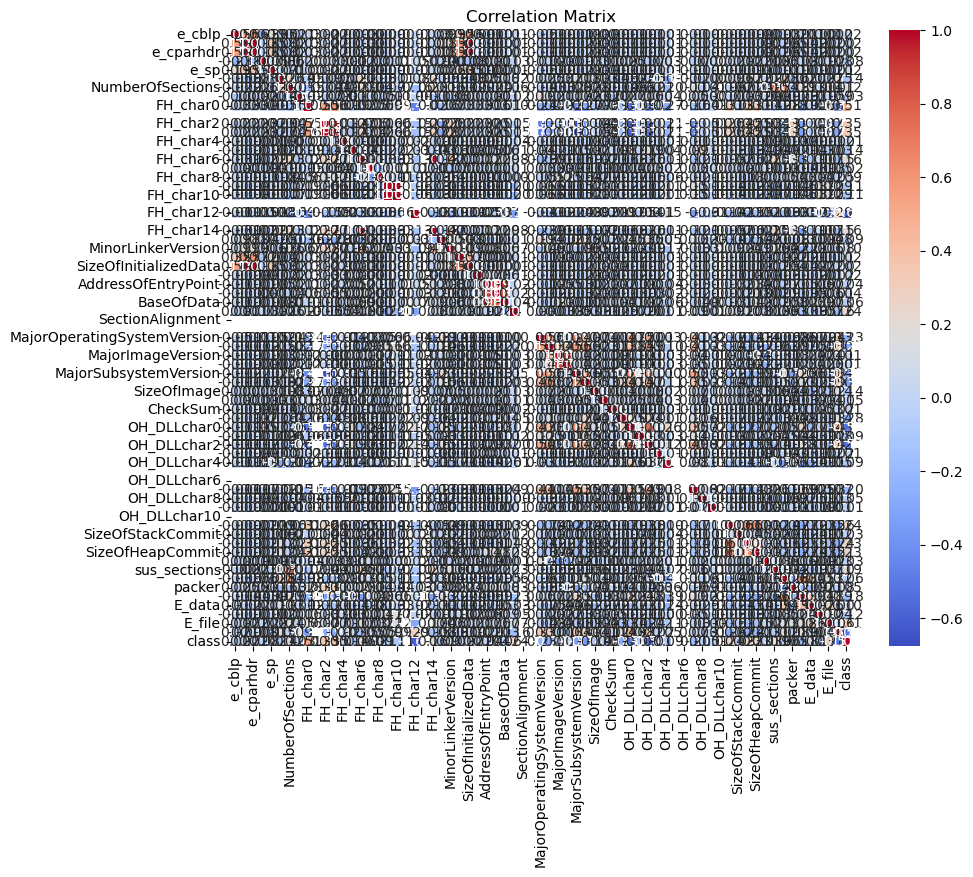

In [32]:
# Create a heatmap of the correlation matrix

corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

AttributeError: 'Line2D' object has no attribute 'set_facecolor'

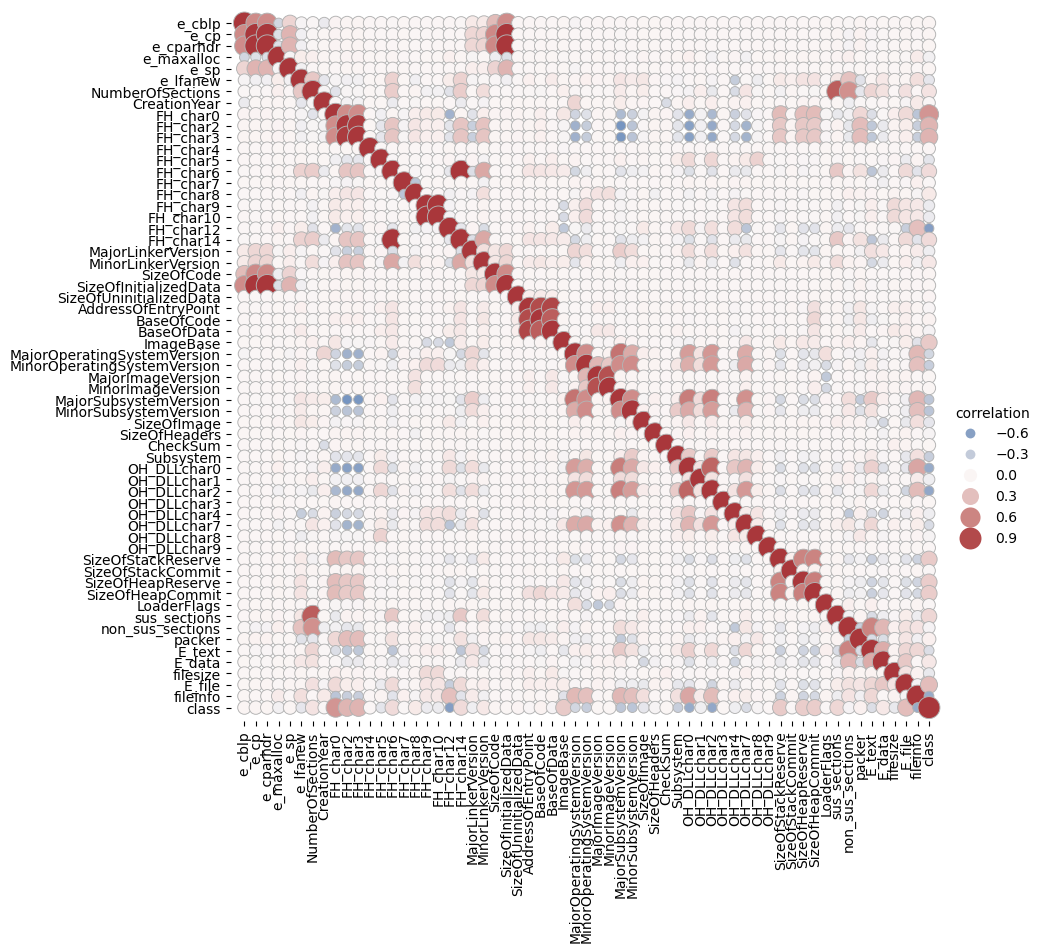

In [40]:
# Exploratory Data Analysis (EDA)
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr().stack().reset_index(name="correlation")

# Create the correlation plot
g = sns.relplot(
    data=corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8)
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)

for label in g.ax.get_xticklabels():
    label.set_rotation(90)

# Instead of setting edge color, you can modify the face color
for artist in g.legend.get_lines():
    artist.set_facecolor(".7")  # Set a uniform face color if desired

# Display the plot
print(df['packer_type'])
dabl.plot(df, target_col='class')
plt.show()



Class Distribution:
class
1    2722
0    2488
Name: count, dtype: int64


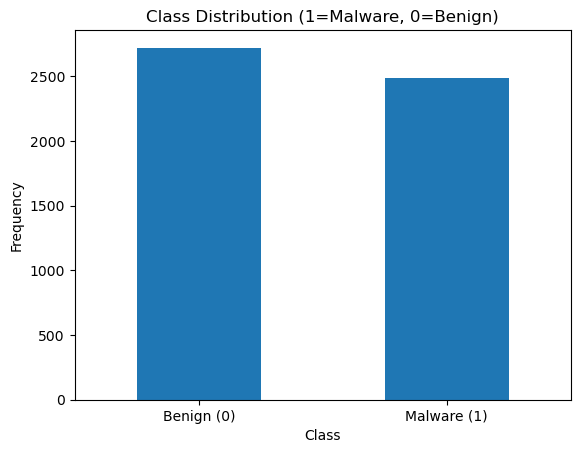

In [42]:
# Print the class distribution

class_distribution = df['class'].value_counts()
print("Class Distribution:")
print(class_distribution)
class_distribution.plot(kind='bar')
plt.title('Class Distribution (1=Malware, 0=Benign)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malware (1)'], rotation=0)
plt.show()

In [44]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Separate features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: Recursive Feature Elimination

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

In [48]:
# Model Tuning: Grid Search with Cross-Validation

parameters = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train_rfe, y_train)

# Cross-Validation: Evaluate model performance

scores = cross_val_score(clf, X_train_rfe, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

# Make predictions on the test data
y_pred = clf.predict(X_test_rfe)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy and confusion matrix

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Cross-validation scores:  [0.8501199  0.83213429 0.83573141 0.83673469 0.81032413]
Average cross-validation score:  0.8330088870080405
Accuracy: 0.84
Confusion Matrix:
[[401 105]
 [ 61 475]]


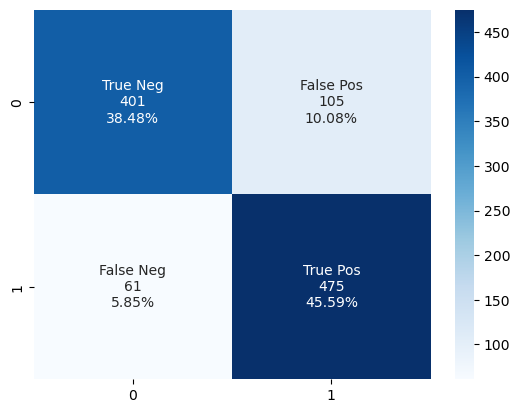

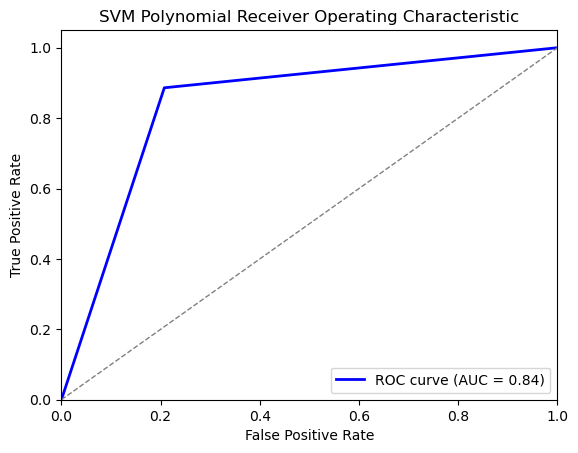

In [52]:
# Assuming 'conf_matrix' is predefined and contains your confusion matrix data

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

fpr_poly, tpr_poly, poly_thresholds = roc_curve(y_test, y_pred)
roc_auc_poly = auc(fpr_poly, tpr_poly)

plt.figure()
plt.plot(fpr_poly, tpr_poly, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_poly)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Polynomial Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [84]:
# Check if 'packer_type' exists in the DataFrame
if 'packer_type' in df.columns:
    # Create a mapping of unique packer types to integers
    pt = df['packer_type'].unique()
    p_types = {pt[i]: i for i in range(len(pt))}
    
    # Map packer_type to numeric values
    df['pt_num'] = df['packer_type'].map(p_types)

    # Pop the target column and packer_type
    cl = df.pop('class')
    df.drop(columns='packer_type', inplace=True)  # Drop the original column

    # Proceed with the train-test split
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    x_train, x_test, y_train, y_test = train_test_split(df, cl, random_state=0)

    # Pipeline made to scale & classify data
    pipeStd = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=0))])
    pipeStd.fit(x_train, y_train)

    # Best parameters found SVM Classifier and cross-validated
    param_grid = {'svm__C': [0.1, 1, 10, 100, 200, 300], 'svm__gamma': [0.001, 0.005, 0.01, 0.1, 1]}
    grid = GridSearchCV(pipeStd, param_grid, cv=5, n_jobs=-1)
    grid.fit(x_train.to_numpy(), y_train)

    # Some core classification metrics
    print('SVC score after StdScaler: {:.3f}'.format(grid.score(x_test.to_numpy(), y_test)))
    print("SVC's best score on cross-validation: {:.3f}".format(grid.best_score_))
    print("Classifier's best parameters: {}".format(grid.best_params_))
    
    pred_val = grid.predict(x_test.to_numpy())
    print(classification_report(y_test, pred_val, target_names=['benign', 'malicious'], digits=3))

    # ROC-AUC score with plot
    fpr, tpr, thresholds = roc_curve(
        y_test, grid.best_estimator_['svm'].decision_function(
            grid.best_estimator_['scaler'].transform(x_test.to_numpy()))
    )
    auc = roc_auc_score(y_test, grid.best_estimator_['svm'].decision_function(
        grid.best_estimator_['scaler'].transform(x_test.to_numpy()))
    )
    close_zero = np.argmin(np.abs(thresholds))

    plt.figure(figsize=(5, 5), dpi=200)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc), color='g')
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="Absolute zero edge", fillstyle='none', color='r')
    plt.legend(loc='lower right')
    plt.title('SVC with StdScaler')
    plt.show()
else:
    print("'packer_type' column not found in the DataFrame. Please check your data.")


'packer_type' column not found in the DataFrame. Please check your data.


In [86]:
#Separate the target Col for Analysis & Scaling the data(Standard scaler)

    #Test Train Split for modeling purpose
X=df.loc[:,[cols for cols in df.columns if ('class' not in cols)]]
y=df.loc[:,[cols for cols in df.columns if 'class' in cols]]

    #Scaling the feature
scaler=StandardScaler()
X=scaler.fit_transform(X)

    #Splitting data into train-set
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=100)

print('Total Shape of Train X:',X_train.shape)
print('Total Shape of Train Y:',y_train.shape)
print('Total Shape of Test X:',X_test.shape)

X_arr=np.array(X_train)
X_test_arr=np.array(X_test)

y_arr=np.array(y_train).reshape(len(y_train),1)
y_test_arr=np.array(y_test).reshape(len(y_test),1)

print(X_arr.shape)
print(X_test_arr.shape)
print(y_arr.shape)


Total Shape of Train X: (3490, 107)
Total Shape of Train Y: (3490, 1)
Total Shape of Test X: (1720, 107)
(3490, 107)
(1720, 107)
(3490, 1)


In [106]:
#### MACHINE LEARNING ALGORITHM  ###

In [88]:
# k-nearest neighbors(KNN) Classifications

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_arr,y_arr)
sklearn_preds = knn.predict(X_test_arr)

# Calculate various metrics
roc_auc = roc_auc_score(y_test_arr, sklearn_preds)
accuracy = accuracy_score(y_test_arr, sklearn_preds)
classification_rep = classification_report(y_test_arr, sklearn_preds)
conf_matrix = confusion_matrix(y_test_arr, sklearn_preds)
f1 = f1_score(y_test_arr, sklearn_preds)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)

C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1. ROC AUC: 0.973
2. Accuracy : 0.9732558139534884
3. Classification Report -
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       821
           1       0.97      0.98      0.97       899

    accuracy                           0.97      1720
   macro avg       0.97      0.97      0.97      1720
weighted avg       0.97      0.97      0.97      1720

4. Confusion Matrix - 
 [[789  32]
 [ 14 885]]
5. F1 Score: 0.975


In [90]:
#Random Forest(RF) Classifier with default hyperparameters

rf_clf = RandomForestClassifier(random_state=100, n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, rf_pred)
accuracy = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)
conf_matrix = confusion_matrix(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)

C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1. ROC AUC: 0.993
2. Accuracy : 0.9930232558139535
3. Classification Report -
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       821
           1       0.99      0.99      0.99       899

    accuracy                           0.99      1720
   macro avg       0.99      0.99      0.99      1720
weighted avg       0.99      0.99      0.99      1720

4. Confusion Matrix - 
 [[814   7]
 [  5 894]]
5. F1 Score: 0.993


In [92]:
#Naive Bayes CLassifier(NB)

# Initialize the Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the model
nb_clf.fit(X_train, y_train)

# Make predictions
nb_pred = nb_clf.predict(X_test)
nb_pred_proba = nb_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, nb_pred)
accuracy = accuracy_score(y_test, nb_pred)
classification_rep = classification_report(y_test, nb_pred)
conf_matrix = confusion_matrix(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)


1. ROC AUC: 0.685
2. Accuracy : 0.6715116279069767
3. Classification Report -
               precision    recall  f1-score   support

           0       0.59      0.99      0.74       821
           1       0.97      0.38      0.55       899

    accuracy                           0.67      1720
   macro avg       0.78      0.69      0.65      1720
weighted avg       0.79      0.67      0.64      1720

4. Confusion Matrix - 
 [[810  11]
 [554 345]]
5. F1 Score: 0.550


C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1. ROC AUC: 0.980
2. Accuracy : 0.9808139534883721
3. Classification Report -
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       821
           1       0.98      0.99      0.98       899

    accuracy                           0.98      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.98      0.98      0.98      1720

4. Confusion Matrix - 
 [[799  22]
 [ 11 888]]
5. F1 Score: 0.982
[[799  22]
 [ 11 888]]


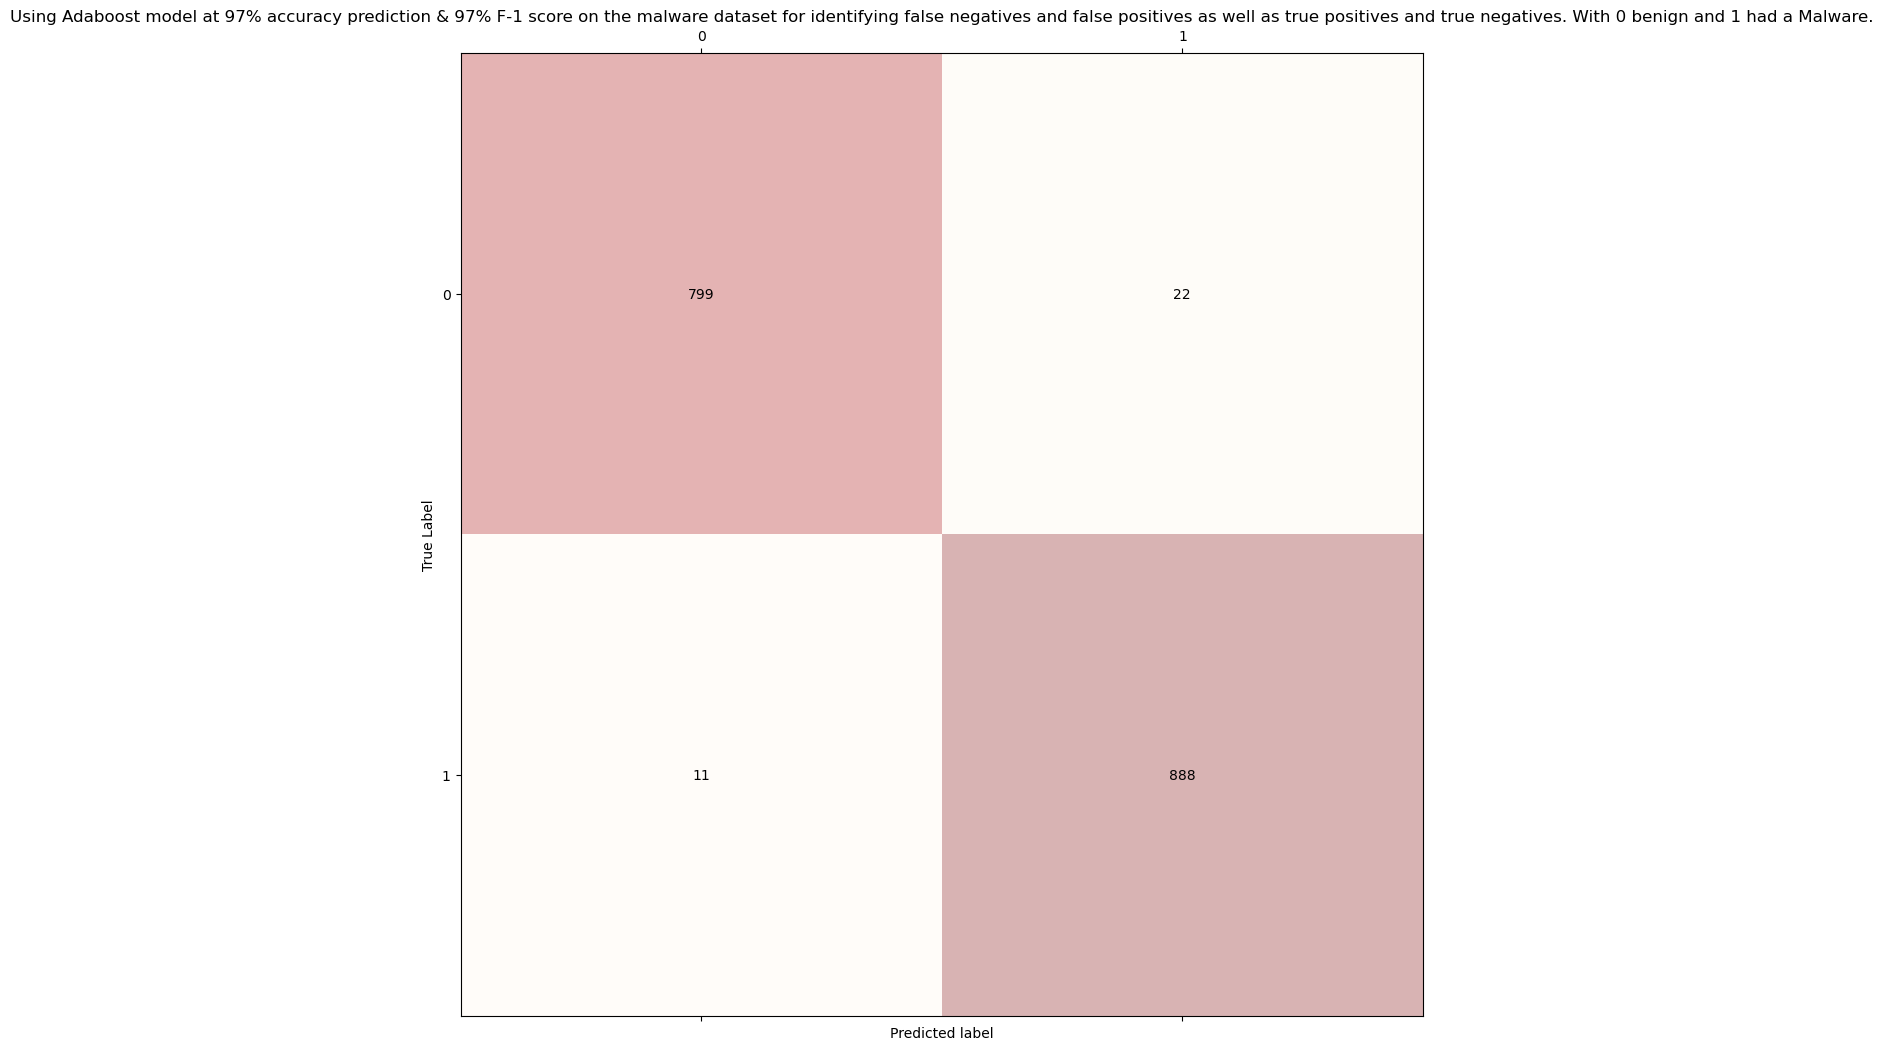

In [96]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=100)

# Fit the model
ada_clf.fit(X_train, y_train)

# Make predictions
ada_pred = ada_clf.predict(X_test)
ada_pred_proba = ada_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, ada_pred)
accuracy = accuracy_score(y_test, ada_pred)
classification_rep = classification_report(y_test, ada_pred)
conf_matrix = confusion_matrix(y_test, ada_pred)
f1 = f1_score(y_test, ada_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)

# Adaboost Model [Matrix]
confmat1 = confusion_matrix(y_true=y_test, y_pred=ada_pred)  # Use ada_pred instead of y_clf

print(confmat1)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat1, cmap=plt.cm.OrRd, alpha=0.30)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax.text(x=j, y=i,
                s=confmat1[i, j],
                va='center', ha='center')

plt.title('Using Adaboost model at 97% accuracy prediction & 97% F-1 score on the malware dataset for identifying false negatives and false positives as well as true positives and true negatives. With 0 benign and 1 had a Malware.')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show()


In [98]:
# Logistic Regression

# Initialize the Logistic Regression classifier
log_reg_clf = LogisticRegression(random_state=100, max_iter=1000)

# Fit the model
log_reg_clf.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg_clf.predict(X_test)
log_reg_pred_proba = log_reg_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, log_reg_pred)
accuracy = accuracy_score(y_test, log_reg_pred)
classification_rep = classification_report(y_test, log_reg_pred)
conf_matrix = confusion_matrix(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)

1. ROC AUC: 0.960
2. Accuracy : 0.9598837209302326
3. Classification Report -
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       821
           1       0.96      0.97      0.96       899

    accuracy                           0.96      1720
   macro avg       0.96      0.96      0.96      1720
weighted avg       0.96      0.96      0.96      1720

4. Confusion Matrix - 
 [[782  39]
 [ 30 869]]
5. F1 Score: 0.962


C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
# Decision Tree Classifier

# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=100)

# Fit the model
dt_clf.fit(X_train, y_train)

# Make predictions
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, dt_pred)
accuracy = accuracy_score(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)
conf_matrix = confusion_matrix(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)

1. ROC AUC: 0.977
2. Accuracy : 0.9767441860465116
3. Classification Report -
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       821
           1       0.98      0.97      0.98       899

    accuracy                           0.98      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.98      0.98      0.98      1720

4. Confusion Matrix - 
 [[805  16]
 [ 24 875]]
5. F1 Score: 0.978


In [102]:
#Linear Discriminant Analysis (LDA)

# Initialize the Linear Discriminant Analysis classifier
lda_clf = LinearDiscriminantAnalysis()

# Fit the model
lda_clf.fit(X_train, y_train)

# Make predictions
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, lda_pred)
accuracy = accuracy_score(y_test, lda_pred)
classification_rep = classification_report(y_test, lda_pred)
conf_matrix = confusion_matrix(y_test, lda_pred)
f1 = f1_score(y_test, lda_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy :', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)



C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1. ROC AUC: 0.945
2. Accuracy : 0.9453488372093023
3. Classification Report -
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       821
           1       0.94      0.96      0.95       899

    accuracy                           0.95      1720
   macro avg       0.95      0.94      0.95      1720
weighted avg       0.95      0.95      0.95      1720

4. Confusion Matrix - 
 [[763  58]
 [ 36 863]]
5. F1 Score: 0.948


In [104]:
#### DEEP LEARNING  MODEL ###

In [109]:
# Multi-Layer Perceptron (MLP)

# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score

# Initialize the MLP classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)

# Fit the model
mlp_clf.fit(X_train, y_train)

# Make predictions
mlp_pred = mlp_clf.predict(X_test)
mlp_pred_proba = mlp_clf.predict_proba(X_test)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, mlp_pred)
accuracy = accuracy_score(y_test, mlp_pred)
classification_rep = classification_report(y_test, mlp_pred)
conf_matrix = confusion_matrix(y_test, mlp_pred)
f1 = f1_score(y_test, mlp_pred)

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy of MLP:', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)


C:\Users\O M A R\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1. ROC AUC: 0.980
2. Accuracy of MLP: 0.9802325581395349
3. Classification Report -
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       821
           1       0.98      0.99      0.98       899

    accuracy                           0.98      1720
   macro avg       0.98      0.98      0.98      1720
weighted avg       0.98      0.98      0.98      1720

4. Confusion Matrix - 
 [[800  21]
 [ 13 886]]
5. F1 Score: 0.981


In [117]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl (390.3 MB)


In [119]:
# 1-Dimensional Convolutional Neural Networks (1D-CNN)

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, f1_score

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Reshape data for 1D-CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Initialize the 1D-CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate various metrics
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
classification_rep = classification_report(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the results
print('1. ROC AUC: %.3f' % roc_auc)
print('2. Accuracy of 1D- CNN:', accuracy)
print('3. Classification Report -\n', classification_rep)
print('4. Confusion Matrix - \n', conf_matrix)
print('5. F1 Score: %.3f' % f1)


C:\Users\O M A R\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8759 - loss: 0.3262
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9541 - loss: 0.1373
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9580 - loss: 0.1059
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9709 - loss: 0.0935
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9689 - loss: 0.0809
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9718 - loss: 0.0717
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9731 - loss: 0.0583
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9674 - loss: 0.0877
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9773 - loss: 0.0632
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0556
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1. ROC AUC: 0.993
2. Accuracy of 1D- CNN: 0.9755813953488373
3. Classification Report -
            